# Ford GoBike System Data Analysis
## by Jimmy Ogeto

## Investigation Overview

- The purpose of this investigation is to get insights on the relationships between the columns of interest and how they affect each other.

> Here are the key insights I gathered from the investigation:
    
   - Male bike riders are high in number followed by female bike riders and those who did not indicate their gender.
   - The duration_minutes column has a largely long tailed distribution with a majoroty of the bike rides lasting between 1 and   40 minutes. In a logscale distribution,it can be seen that the distribution is slightly bimodal with a the first peak between   3-5 minutes and the other between 10 and 15 minutes.
   - The average duration of rides vary very slighlty by age-roup, with young riders(18-35) having a low average while   seniors(> 60 years) have a higher average.
   - Subscribers on average, ride bikes longer thoughout the week and on the weekends, the customers and subscribers both have week high averages in duration of their bike rides.
   - The distribution of the hours column is roughly bimodal with 2 peaks. The fist peak is at 8am and the other at 5pm. These   2 peaks indicate the times when most bike rides start. As compared to other parts of the day, it is in the afternoon(12pm-   6pm) that a bulk of the bike rides take place. These 2 peaks could represent when most of the riders use the bikes to get to  work and get back from work in the evening.
   - It is young people(18-35) that compose the largest group of bike riders throught the week.
   - The number of bike riders who are subscribers is consistently higher than that of customers throughout the week.


## Dataset Overview

- This dataset was provided by the Ford GoBike System covering the greater San Francisco Bay area between. The dataset is composed of records of all the bike rides that occured between 2019-02-01 and 2019-02-28. After cleaning and doing some feature engineering there are 174952 rows and 23 columns.
- Most of the columns provided are self-explanatory except for a few. Here they are:
  - start_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude.
  - end_time, end_station_id, end_station_name, end_station_longitude, end_station_latitude.
  - duration_sec, duration_minutes, bike_id, age, hour, day, week, member_birth_year, member_gender, 
  - user_type - (subscriber, customer)-Whether a bike rider is a subscriber of the service or a customer.
  - bike_share_for_all_trip- (yes, no)- whether a rider is part of the bikeshare program for low income residents or not.
  - TOD - (early_morning, morning, afternoon, night)- part of the day based on what time the bike ride took place.
  - age_group - (young, middle_age, old) - age group of the rider based on their age. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes_clean = pd.read_csv('bikes_clean.csv')

In [3]:
# function for plotting a figure object
def fig(x,y):
    plt.figure(figsize=(x,y))

# function for plotting countplots in the univariate plots
def countplot(col, title):
    base_color = sns.color_palette()[0]
    sns.countplot(data=bikes_clean, x=col, color=base_color)
    plt.title(title, size=15)
    
color = sns.color_palette()[0]

### I) Member gender distribution

> Male bike riders are high in number followed by female bike riders and those who did not indicate their gender.

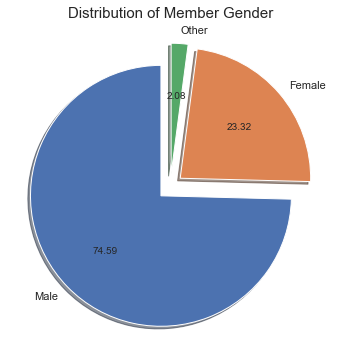

In [4]:
fig(12,6)
bikes_clean['member_gender'].value_counts().plot(kind='pie', autopct='%.2f', startangle=90, ylabel='',
                                                 explode=[0.1,0.1,0.1], shadow=True)
plt.title('Distribution of Member Gender', size=15);

### II) Bike ride duration
> The duration_minutes column has a largely long tailed distribution with a majority of the bike rides lasting between 1 and 40 minutes. In a logscale distribution,it can be seen that the distribution is slightly bimodal with a the first peak between 3-5 minutes and the other between 10 and 15 minutes.

In [5]:
# subsetting for bike rides that lasted for less than a 100 minutes
sub_min = bikes_clean[bikes_clean['duration_minutes'] < 100]
np.log10(sub_min['duration_minutes'].describe())

count    5.241168
mean     1.023807
std      0.927569
min      0.000000
25%      0.698970
50%      0.903090
75%      1.113943
max      1.995635
Name: duration_minutes, dtype: float64

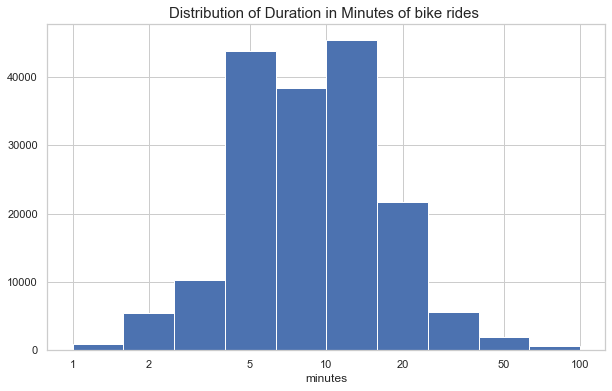

In [6]:
# putting it on a log scale because of the long tailed distribution
b_size = 0.2
bins = 10 **np.arange(0, 2+b_size, b_size)

fig(10,6)
plt.hist(data=sub_min, x='duration_minutes', bins=bins, color=color)
plt.xscale('log')
ticks = [1,2,5,10,20,50,100]
labels = [1,2,5,10,20,50,100]
plt.xticks(ticks, labels)
plt.xlabel('minutes')
plt.title('Distribution of Duration in Minutes of bike rides ', size=15);

### II) Bike duration by age group

> The average duration of rides vary very slighlty by age-roup, with young riders(18-35) having a low average while seniors(> 60 years) have a higher average

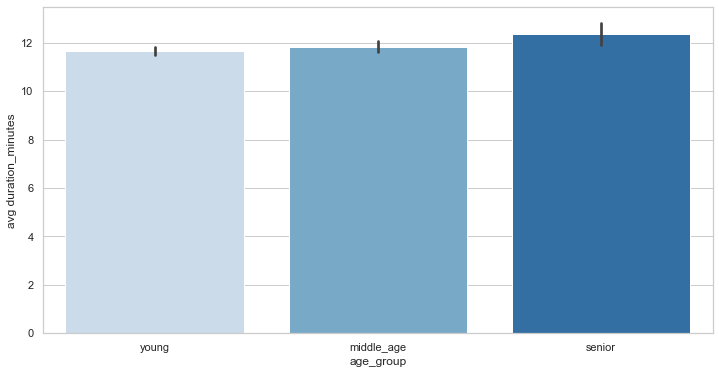

In [7]:
fig(12,6)
sns.barplot(data=bikes_clean, x='age_group', y='duration_minutes', palette='Blues')
plt.ylabel('avg duration_minutes');

### III) Average duration per user type in a week
> Subscribers on average, ride bikes longer thoughout the week and on the weekends, the customers and subscribers both have week high averages in duration of their bike rides

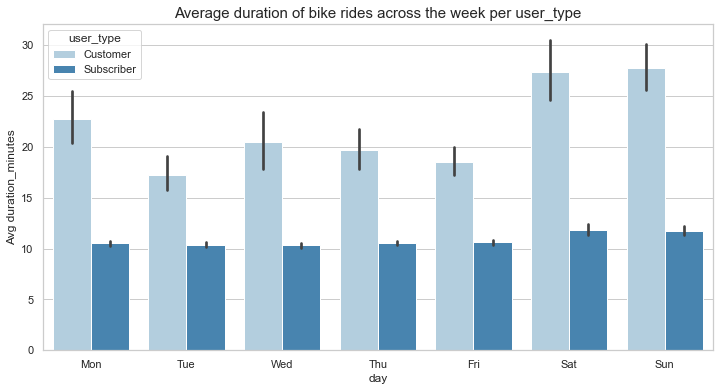

In [8]:
fig(12,6)
sns.barplot(data=bikes_clean, x='day', y='duration_minutes', hue='user_type',
           order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='Blues')
plt.ylabel('Avg duration_minutes')
plt.title('Average duration of bike rides across the week per user_type', size=15);

### IV) Peak bike riding hours

> The distribution of the hours column is roughly bimodal with 2 peaks. The fist peak is at 8am and the other at 5pm. These 2 peaks indicate the times when most bike rides start. As compared to other parts of the day, it is in the afternoon(12pm- 6pm) that a bulk of the bike rides take place. These 2 peaks could represent when most of the riders use the bikes to get to work and get back from work in the evening.

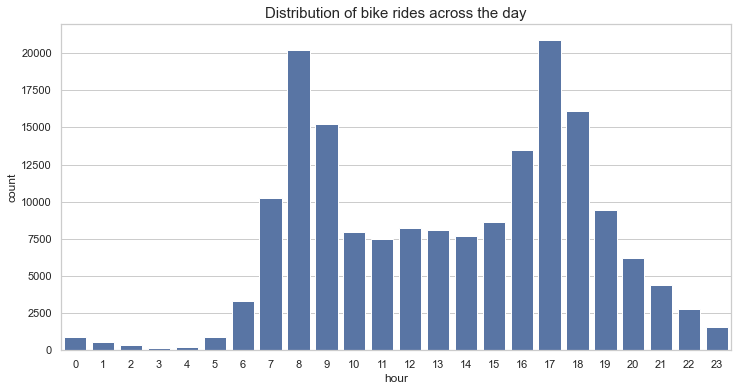

In [9]:
fig(12,6)
countplot('hour', 'Distribution of bike rides across the day');

### V) Largest age group of riders

> It is young people(18-35) that compose the largest group of bike riders throught the week.

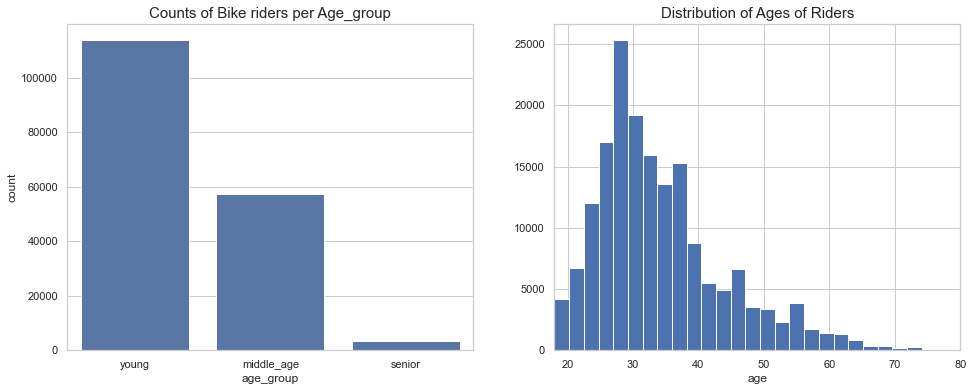

In [10]:
fig(16,6)

plt.subplot(1,2,1)
countplot('age_group', 'Counts of Bike riders per Age_group')

plt.subplot(1,2,2)
bins = 45
plt.hist(data=bikes_clean, x='age', bins=bins, color=color)
# zooming in on ages between 18 and 80
plt.xlim(18,80)
plt.xlabel('age')
plt.title('Distribution of Ages of Riders', size=15);


### VI) Category of bike riders throught the week 

> The number of bike riders who are subscribers is consistently higher than that of customers throughout the week.

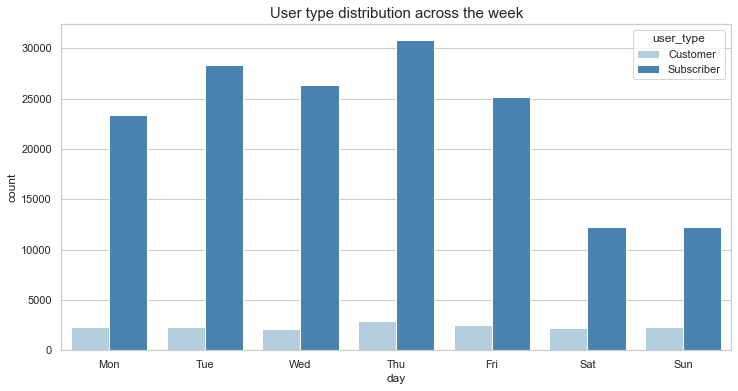

In [11]:
# day of the week versus user_type
fig(12,6)
sns.countplot(data=bikes_clean, x='day', hue='user_type', 
              palette='Blues', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('User type distribution across the week', size=15);